In [70]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [71]:
# load data into dataframe

df = pd.read_csv('./SQUAD1text-image_Responses_Aggregated_results.tsv', sep='\t')


In [72]:
df

,survey,score,difficulty,engagement
0,text,1.000000,2,5
1,text,0.777778,4,3
2,text,0.555556,1,5
3,text,0.444444,4,4
4,text,0.777778,3,5
5,text,0.444444,5,4
6,text,0.777778,1,5
7,text,0.444444,4,3
8,text,0.444444,4,5
9,text,0.888889,2,5


<IPython.core.display.Javascript object>


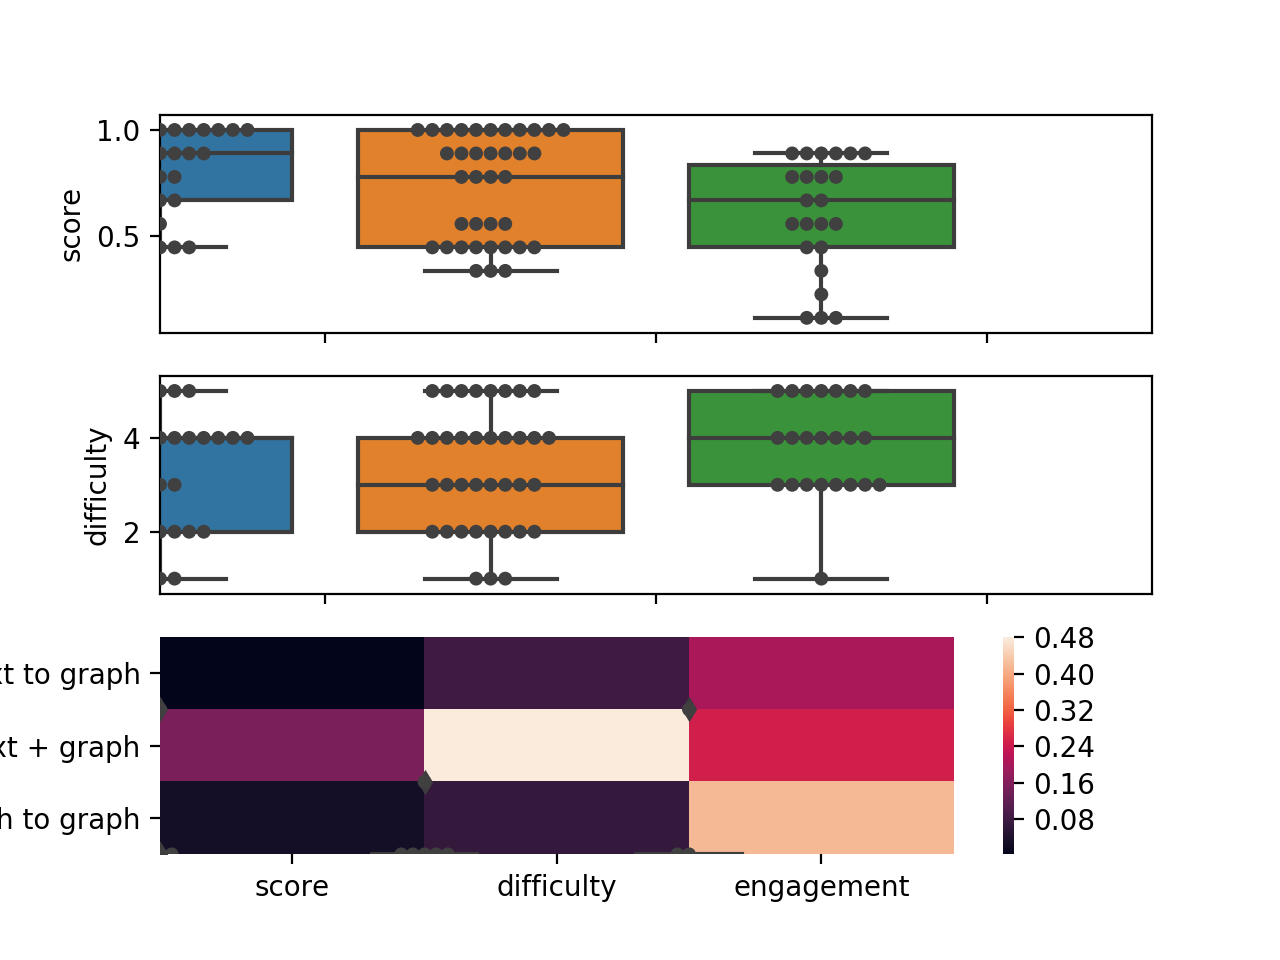

In [73]:
fig, ax = plt.subplots(3, 1, sharex=True, sharey=False)
sns.boxplot(x="survey", y="score", data=df, ax=ax[0])
ax[0].xaxis.label.set_visible(False)
sns.swarmplot(x="survey", y="score", data=df, color=".25", ax=ax[0])

sns.boxplot(x="survey", y="difficulty", data=df, ax=ax[1])

sns.swarmplot(x="survey", y="difficulty", data=df, color=".25", ax=ax[1])
ax[1].xaxis.label.set_visible(False)

sns.boxplot(x="survey", y="engagement", data=df, ax=ax[2])
sns.swarmplot(x="survey", y="engagement", data=df, color=".25", ax=ax[2])


In [74]:
fig.savefig('survey_results.png')

In [56]:
from itertools import combinations

from scipy.stats import mannwhitneyu
surveys = ('text', 'text + graph', 'graph')
metrics = ('score', 'difficulty', 'engagement')

test_results = {}

for survey_1, survey_2 in combinations(surveys, 2):
    subdf_1 = df.loc[df.survey == survey_1]
    subdf_2 = df.loc[df.survey == survey_2]
    df_row = {}
    for metric in metrics:
        data1 = subdf_1[metric]
        data2 = subdf_2[metric]
        u, prob = mannwhitneyu(data1, data2, use_continuity=False)
        print(survey_1, "|", survey_2, "|",  metric,u, prob)
        df_row[metric] = prob
    test_results[(survey_1, survey_2)] = df_row

test_results


text | text + graph | score 541.5 0.15056098471495566
text | text + graph | difficulty 625.0 0.4810955392235429
text | text + graph | engagement 581.0 0.24914848307409487
text | graph | score 216.0 0.0019395097317090589
text | graph | difficulty 308.5 0.08241709394565722
text | graph | engagement 349.5 0.20535054295335142
text + graph | graph | score 300.5 0.027076555418825855
text + graph | graph | difficulty 330.5 0.06816895632576078
text + graph | graph | engagement 414.0 0.4191652365329036


{('text', 'text + graph'): {'score': 0.15056098471495566,
  'difficulty': 0.4810955392235429,
  'engagement': 0.24914848307409487},
 ('text', 'graph'): {'score': 0.0019395097317090589,
  'difficulty': 0.08241709394565722,
  'engagement': 0.20535054295335142},
 ('text + graph', 'graph'): {'score': 0.027076555418825855,
  'difficulty': 0.06816895632576078,
  'engagement': 0.4191652365329036}}

In [69]:
df_stats = pd.DataFrame.from_dict(test_results, orient='index')
df_stats.reset_index(inplace=True)
# df_stats.columns = df.columns.map(' '.join).str.strip()
# df_stats.columns = [' '.join(col).strip() for col in df_stats.columns.values]

df_stats['comparison'] = df_stats.iloc[:, 0:2].apply(lambda x: ' to '.join(x), axis=1)

df_stats
# pd.DataFrame(df_stats.to_records(),columns=df_stats.index.names + list(df_stats.columns))

,level_0,level_1,score,difficulty,engagement,comparison
0,text,graph,0.001940,0.082417,0.205351,text to graph
1,text,text + graph,0.150561,0.481096,0.249148,text to text + graph
2,text + graph,graph,0.027077,0.068169,0.419165,text + graph to graph


In [81]:
df_stats.iloc[:, 2:].set_index('comparison')

,score,difficulty,engagement
comparison,,,
text to graph,0.001940,0.082417,0.205351
text to text + graph,0.150561,0.481096,0.249148
text + graph to graph,0.027077,0.068169,0.419165


In [92]:
from matplotlib.colors import ListedColormap
print(df_stats.iloc[:, 2:].set_index('comparison').to_string())
# fig, ax = plt.subplots(1, 1, sharex=True, sharey=False)

# sns.heatmap(
#     data=df_stats.iloc[:, 2:].set_index('comparison'),
#     cbar=False,
#     annot=True,
#     square=False,
#     cmap=ListedColormap(['white']),
    
# )

                          score  difficulty  engagement
comparison                                             
text to graph          0.001940    0.082417    0.205351
text to text + graph   0.150561    0.481096    0.249148
text + graph to graph  0.027077    0.068169    0.419165
